In [1]:
import sys
sys.path.append("../lropy")

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta
from pathlib import Path

In [3]:
import lropy.analysis.plotting
from lropy.analysis.transform import spher2cart, align_vectors

In [4]:
moon_polar_radius = 1736  # km
earth_radius = 6378  # km

In [5]:
def convert(string):
    points = []
    for line in string.split("\n"):
        line = line[1:-1].replace(",", "").split("; ")
        points.append(np.array(list(map(float, line))))
    return points

In [6]:
data_sin="""{-3,872,057.3932851967; 5,068,312.179814314; 2,419.179409735}
{-3,831,035.0736087593; 4,489,829.1552622495; -2,417,690.4439390684}
{-4,320,071.005447855; 4,116,139.8313553194; -2,252,776.521982735}
{-4,758,489.313971709; 3,781,047.690790803; -1,934,187.2893182524}
{-5,116,412.515974926; 3,507,388.7091822214; -1,483,634.075658103}
{-5,369,448.736737052; 3,313,812.2938833544; -931,821.3379388382}
{-5,500,353.975975268; 3,213,510.3576966645; -316,354.2023223559}
{-5,500,207.257966628; 3,213,318.3118164884; 320,824.2630066108}
{-5,369,018.581300961; 3,313,249.2438521916; 936,291.3986230919}
{-5,115,728.237493491; 3,506,493.0259292144; 1,488,104.1363423585}
{-4,757,597.544892607; 3,779,880.413649452; 1,938,657.3500025077}
{-4,319,032.518360117; 4,114,780.5083337957; 2,257,246.58266699}
{-3,829,920.6396912304; 4,488,370.42197808; 2,422,160.5046233223}
{-3,323,594.075121636; 4,875,190.61935397; 2,422,160.504623322}
{-2,834,558.1432825415; 5,248,879.943260902; 2,257,246.5826669885}
{-2,396,139.834758688; 5,583,972.083825418; 1,938,657.3500025047}
{-2,038,216.632755471; 5,857,631.065433999; 1,488,104.1363423546}
{-1,785,180.4119933466; 6,051,207.480732865; 936,291.3986230884}
{-1,654,275.17275513; 6,151,509.416919553; 320,824.263006608}
{-1,654,421.8907637703; 6,151,701.462799729; -316,354.2023223578}
{-1,785,610.5674294387; 6,051,770.530764026; -931,821.3379388386}
{-2,038,900.9112369088; 5,858,526.748687004; -1,483,634.075658103}
{-2,397,031.6038377876; 5,585,139.360966765; -1,934,187.2893182524}
{-2,835,596.6303702774; 5,250,239.266282423; -2,252,776.521982735}
{-3,324,708.509039162; 4,876,649.352638139; -2,417,690.4439390684}"""

In [7]:
data_cos = """{-3,872,057.3932851967; 5,068,312.179814314; 2,419.179409735}
{-3,831,035.0736087593; 4,489,829.1552622495; -2,417,690.4439390684}
{-4,320,071.005447855; 4,116,139.8313553194; -2,252,776.521982735}
{-4,758,489.313971709; 3,781,047.690790803; -1,934,187.2893182524}
{-5,116,412.515974926; 3,507,388.7091822214; -1,483,634.075658103}
{-5,369,448.736737052; 3,313,812.2938833544; -931,821.3379388382}
{-5,500,353.975975268; 3,213,510.3576966645; -316,354.2023223559}
{-5,500,207.257966628; 3,213,318.3118164884; 320,824.2630066108}
{-5,369,018.581300961; 3,313,249.2438521916; 936,291.3986230919}
{-5,115,728.237493491; 3,506,493.0259292144; 1,488,104.1363423585}
{-4,757,597.544892607; 3,779,880.413649452; 1,938,657.3500025077}
{-4,319,032.518360117; 4,114,780.5083337957; 2,257,246.58266699}
{-3,829,920.6396912304; 4,488,370.42197808; 2,422,160.5046233223}
{-3,323,594.075121636; 4,875,190.61935397; 2,422,160.504623322}
{-2,834,558.1432825415; 5,248,879.943260902; 2,257,246.5826669885}
{-2,396,139.834758688; 5,583,972.083825418; 1,938,657.3500025047}
{-2,038,216.632755471; 5,857,631.065433999; 1,488,104.1363423546}
{-1,785,180.4119933466; 6,051,207.480732865; 936,291.3986230884}
{-1,654,275.17275513; 6,151,509.416919553; 320,824.263006608}
{-1,654,421.8907637703; 6,151,701.462799729; -316,354.2023223578}
{-1,785,610.5674294387; 6,051,770.530764026; -931,821.3379388386}
{-2,038,900.9112369088; 5,858,526.748687004; -1,483,634.075658103}
{-2,397,031.6038377876; 5,585,139.360966765; -1,934,187.2893182524}
{-2,835,596.6303702774; 5,250,239.266282423; -2,252,776.521982735}
{-3,324,708.509039162; 4,876,649.352638139; -2,417,690.4439390684}
{-3,475,520.6951616616; 3,714,451.616356726; -3,847,626.2485622982}
{-4,253,464.519024307; 3,119,997.7477349574; -3,585,286.083551466}
{-4,950,887.332317004; 2,586,943.1310798153; -3,078,483.8022376676}
{-5,520,260.922859548; 2,151,614.557601941; -2,361,757.1425620685}
{-5,922,783.421390815; 1,843,678.9501693733; -1,483,949.841934754}
{-6,131,023.584835777; 1,684,121.6115409853; -504,883.0172483218}
{-6,130,790.190188799; 1,683,816.110663332; 508,721.5453792773}
{-5,922,099.142909374; 1,842,783.2669163635; 1,487,788.3700657086}
{-5,519,172.392991334; 2,150,189.7313070856; 2,365,595.6706930236}
{-4,949,468.732573649; 2,585,086.261300464; 3,082,322.330368623}
{-4,251,812.524633979; 3,117,835.3770779567; 3,589,124.611682421}
{-3,473,747.8868120094; 3,712,131.106808861; 3,851,464.7766932533}
{-2,668,298.6383627024; 4,327,473.1786321495; 3,851,464.7766932524}
{-1,890,354.8145000576; 4,921,927.047253921; 3,589,124.6116824183}
{-1,192,932.0012073615; 5,454,981.663909062; 3,082,322.3303686185}
{-623,558.4106648178; 5,890,310.237386935; 2,365,595.6706930175}
{-221,035.9121335531; 6,198,245.844819504; 1,487,788.3700657026}
{-12,795.7486885907; 6,357,803.183447889; 508,721.5453792727}
{-13,029.1433355673; 6,358,108.684325541; -504,883.0172483237}
{-221,720.1906149914; 6,199,141.528072511; -1,483,949.841934756}
{-624,646.9405330322; 5,891,735.06368179; -2,361,757.1425620667}
{-1,194,350.6009507137; 5,456,838.53368841; -3,078,483.8022376657}
{-1,892,006.808890385; 4,924,089.417910923; -3,585,286.083551466}
{-2,670,071.446712352; 4,329,793.688180017; -3,847,626.2485622982}
{-2,883,155.32490881; 2,685,940.338218021; -5,015,352.6828490235}
{-3,896,991.454811718; 1,911,232.9736465197; -4,673,464.323491558}
{-4,805,890.560693057; 1,216,542.6721113967; -4,012,986.731469609}
{-5,547,912.670513799; 649,211.4296322651; -3,078,930.363188644}
{-6,072,490.203739181; 247,901.9328248715; -1,934,949.6165458802}
{-6,343,874.068385256; 39,962.7607013402; -659,004.8889074503}
{-6,343,569.902559431; 39,564.6242061579; 661,950.2951364489}
{-6,071,598.434660081; 246,734.6556835221; 1,937,895.0227748803}
{-5,546,494.070770448; 647,354.5598529149; 3,081,875.769417644}
{-4,804,041.805513611; 1,214,122.7523008846; 4,015,932.137698609}
{-3,894,838.533806452; 1,908,414.917340828; 4,676,409.729720557}
{-2,880,844.9560863576; 2,682,916.1912973225; 5,018,298.089078023}
{-1,831,163.0589713398; 3,484,845.592274109; 5,018,298.089078021}
{-817,326.9290684327; 4,259,552.956845612; 4,676,409.729720553}
{91,572.1768129049; 4,954,243.258380734; 4,015,932.137698603}
{833,594.2866336475; 5,521,574.500859868; 3,081,875.7694176366}
{1,358,171.8198590293; 5,922,883.997667259; 1,937,895.0227748733}
{1,629,555.684505102; 6,130,823.169790788; 661,950.2951364433}
{1,629,251.5186792773; 6,131,221.30628597; -659,004.888907453}
{1,357,280.050779929; 5,924,051.274808606; -1,934,949.616545882}
{832,175.6868902943; 5,523,431.370639214; -3,078,930.363188644}
{89,723.421633462; 4,956,663.178191245; -4,012,986.731469607}
{-819,479.850073698; 4,262,371.013151305; -4,673,464.323491558}
{-1,833,473.4277937892; 3,487,869.7391948095; -5,015,352.6828490235}"""

In [8]:
points_sin = convert(data_sin)
points_cos = convert(data_cos)

In [9]:
def plot_points(points):
    h = 5900e3
    radius = 6378e3
    pos = points[0] / np.linalg.norm(points[0]) * (radius + h)

    fig, ax = plt.subplots(1, 1, figsize=[20, 10],
                                        subplot_kw={"projection": "3d", "proj_type": "ortho"})
    ax.view_init(elev=10, azim=-50)

    azimuths, polars = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]

    ax.plot_surface(*spher2cart(6378e3, polars, azimuths), alpha=0.3, linewidth=0.1)
    ax.scatter(*np.hsplit(np.vstack(points), 3), c="red")

    ax.scatter(*pos, marker="X", c="black", label="spacecraft")

    # Draw circle of visible region
    rotation = align_vectors(np.array([0, 0, 1]), pos)
    visible_region = np.zeros((50, 3))

    cap_polar = np.arccos(radius / (h + radius))
    for i, azimuth in enumerate(np.linspace(0, 2*np.pi, 50)):
        visible_region[i, :] = rotation @ np.array(spher2cart(radius, cap_polar, azimuth))
    ax.plot(*visible_region.T, c="green", label="visible latitude")

    ax.set_aspect("equal")
    ax.legend()

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

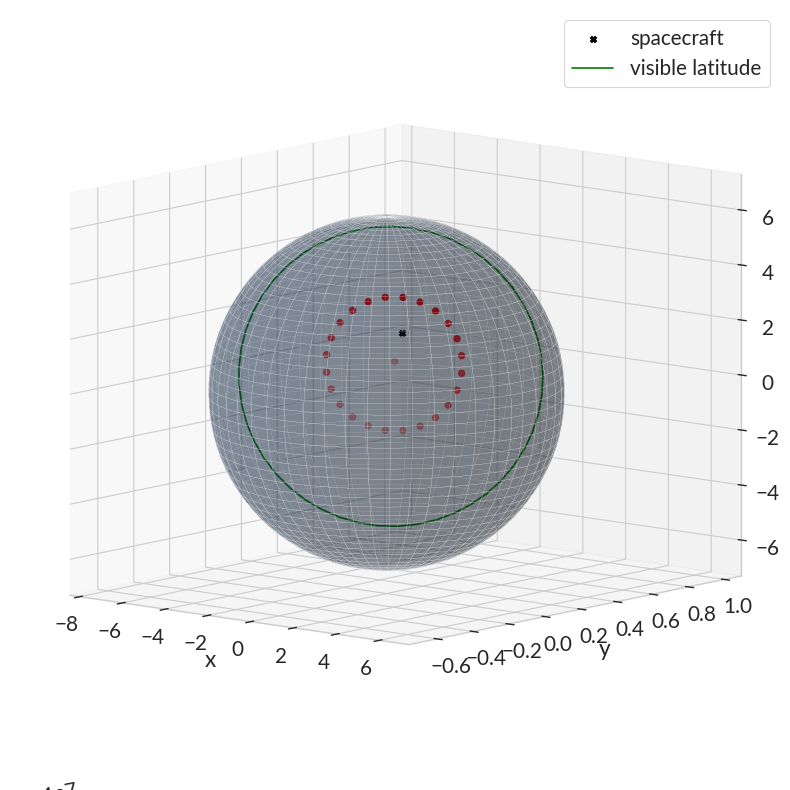

In [10]:
plot_points(points_sin)

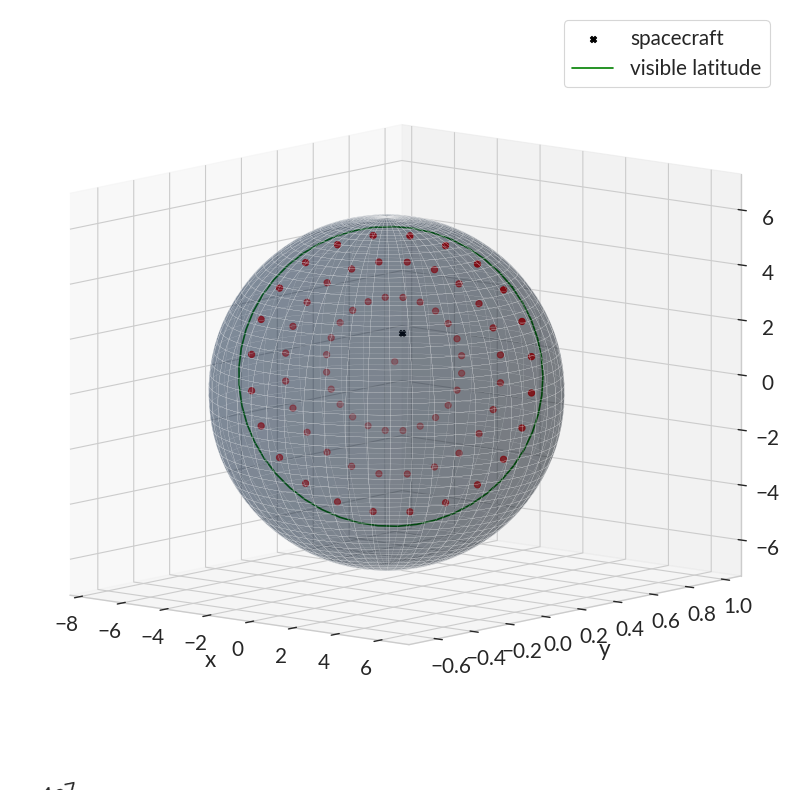

In [11]:
plot_points(points_cos)